**Importing Libraries & Loading Data**

In [1]:
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns        # For advanced statistical visualizations
from wordcloud import WordCloud  # For creating word clouds from text data

# Optional: Make plots look a bit nicer
sns.set_theme(style="whitegrid", palette="muted")

df = pd.read_csv("reviews_enriched_latest.csv")

**Basic Data Inspection**

In [3]:
# Check the overall shape of the dataset (rows, columns)
df.head()


,review_id,company,job_title,department,location,review_date,overall_rating,pros,cons,employee_id,name,status,joining_date,exit_date,engagement_score,performance_rating,salary_band,gender,age
0,review-64033626,Nineleaps Technology Solutions,Data Engineer,IT Support,Bangalore / Bengaluru,2024-12-18,2,Here at NINELEAPS we have fun with team and ev...,Skill development is poor. You might be workin...,EMP0014,Lakshmi Iyer,Exited,2019-09-07,2022-05-23,7.0,3,C,Female,26
1,review-65978126,Nineleaps Technology Solutions,Lead Software Engineer,Software Development,Bangalore / Bengaluru,2025-01-31,5,People are friendly. Company even supports ski...,Management should address queries immediately ...,EMP0002,Diya Iyer,Active,2019-09-18,NaN,6.1,2,B,Male,36
2,review-61666842,Nineleaps Technology Solutions,Software Development Engineer II,Software Development,Bangalore / Bengaluru,2024-10-16,1,Nothing is good here,"Terrible work hours, management believes in pu...",EMP0009,Aarav Patel,Exited,2018-08-06,2020-03-24,5.0,5,A,Female,24
3,review-52536394,Nineleaps Technology Solutions,Front end Engineer,Software Development,Bangalore / Bengaluru,2023-11-25,4,I have had a consistently positive experience ...,sometimes unclear communication and limited tr...,EMP0011,Aisha Iyer,Active,2020-06-18,NaN,6.5,3,C,Male,48
4,review-71474624,Nineleaps Technology Solutions,Associate,Software Development,Bangalore / Bengaluru,2025-06-17,5,Company ensures the safety and convenience. Fo...,You will have to be competitive with your resu...,EMP0014,Lakshmi Iyer,Exited,2019-09-07,2022-05-23,7.0,3,C,Female,26


In [4]:
df.shape # Check the overall shape of the dataset (rows, columns)

(140, 19)

In [7]:
df.info() # Get a concise summary: column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           140 non-null    object 
 1   company             140 non-null    object 
 2   job_title           140 non-null    object 
 3   department          140 non-null    object 
 4   location            127 non-null    object 
 5   review_date         140 non-null    object 
 6   overall_rating      140 non-null    int64  
 7   pros                137 non-null    object 
 8   cons                126 non-null    object 
 9   employee_id         140 non-null    object 
 10  name                140 non-null    object 
 11  status              140 non-null    object 
 12  joining_date        140 non-null    object 
 13  exit_date           59 non-null     object 
 14  engagement_score    140 non-null    float64
 15  performance_rating  140 non-null    int64  
 16  salary_b

In [8]:
df.describe() # View basic statistical summary for numerical columns

,overall_rating,engagement_score,performance_rating,age
count,140.000000,140.000000,140.000000,140.000000
mean,3.992857,6.553571,3.142857,34.671429
std,1.153639,1.459595,1.370666,9.089042
min,1.000000,4.200000,1.000000,22.000000
25%,3.000000,5.300000,2.000000,25.000000
50%,4.000000,6.600000,3.000000,36.000000
75%,5.000000,7.900000,4.250000,43.000000
max,5.000000,8.900000,5.000000,50.000000


In [9]:
df.nunique() # View unique values in each column to understand cardinality

review_id             140
company                 1
job_title              63
department             26
location                7
review_date           128
overall_rating          5
pros                  132
cons                  122
employee_id            75
name                   55
status                  2
joining_date           87
exit_date              37
engagement_score       38
performance_rating      5
salary_band             3
gender                  2
age                    27
dtype: int64

**Data Quality Checks**

In [13]:
# Check missing values count per column
df.isnull().sum()

review_id              0
company                0
job_title              0
department             0
location              13
review_date            0
overall_rating         0
pros                   3
cons                  14
employee_id            0
name                   0
status                 0
joining_date           0
exit_date             81
engagement_score       0
performance_rating     0
salary_band            0
gender                 0
age                    0
dtype: int64

In [14]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

review_id              0.000000
company                0.000000
job_title              0.000000
department             0.000000
location               9.285714
review_date            0.000000
overall_rating         0.000000
pros                   2.142857
cons                  10.000000
employee_id            0.000000
name                   0.000000
status                 0.000000
joining_date           0.000000
exit_date             57.857143
engagement_score       0.000000
performance_rating     0.000000
salary_band            0.000000
gender                 0.000000
age                    0.000000
dtype: float64

In [15]:
# Check for duplicate rows based on 'review_id' (should be unique)
df['review_id'].duplicated().sum()

0

In [16]:
# Quick check for out-of-range values in numerical columns
print("Overall Rating Range:", df['overall_rating'].min(), "-", df['overall_rating'].max())
print("Engagement Score Range:", df['engagement_score'].min(), "-", df['engagement_score'].max())
print("Performance Rating Range:", df['performance_rating'].min(), "-", df['performance_rating'].max())
print("Age Range:", df['age'].min(), "-", df['age'].max())

Overall Rating Range: 1 - 5
Engagement Score Range: 4.2 - 8.9
Performance Rating Range: 1 - 5
Age Range: 22 - 50


**Descriptive Statistics & Distributions**

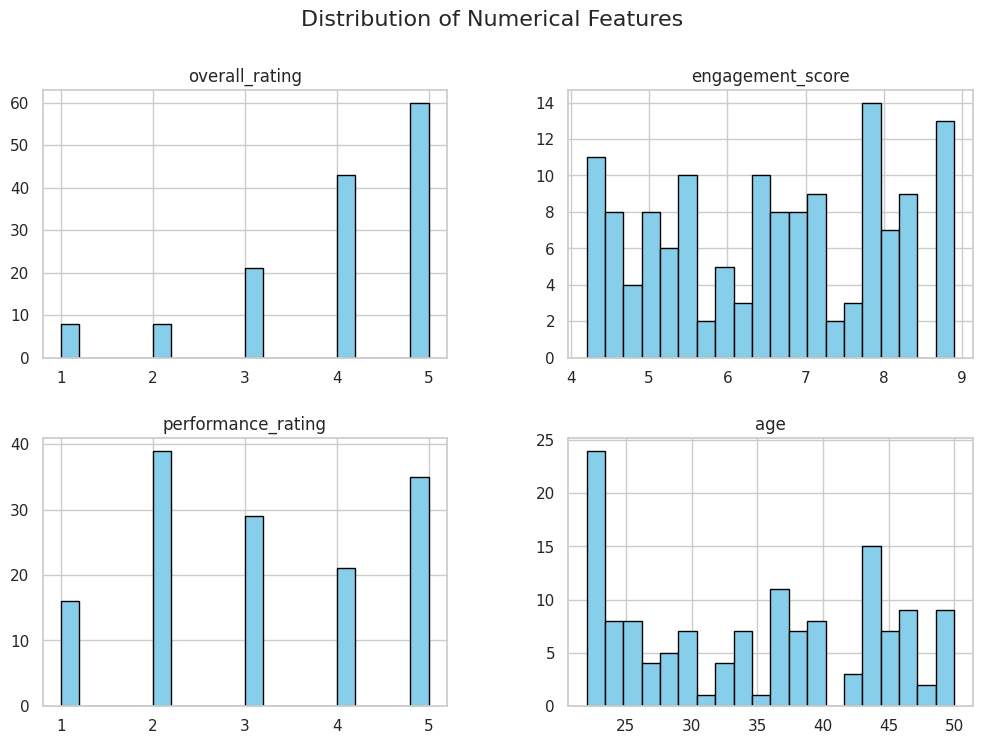

In [17]:
# Histogram for numerical features
num_cols = ['overall_rating', 'engagement_score', 'performance_rating', 'age']
df[num_cols].hist(bins=20, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

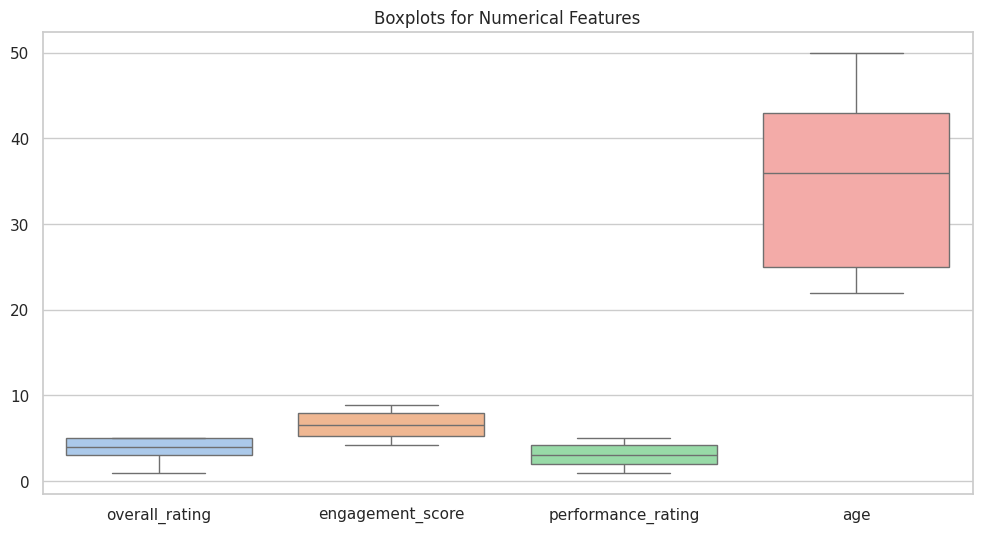

In [18]:
# Boxplots for numerical features to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], palette="pastel")
plt.title("Boxplots for Numerical Features")
plt.show()

/tmp/ipykernel_40094/3175533074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


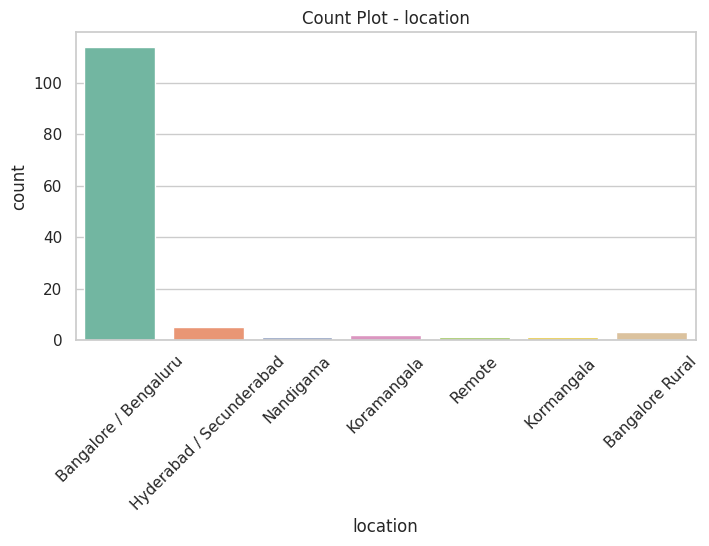

/tmp/ipykernel_40094/3175533074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


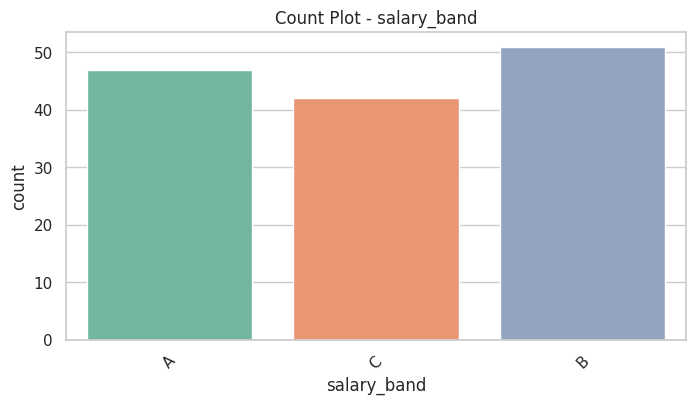

/tmp/ipykernel_40094/3175533074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


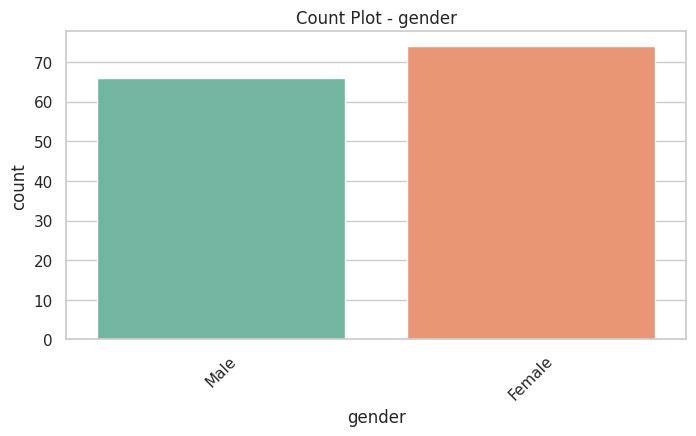

/tmp/ipykernel_40094/3175533074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


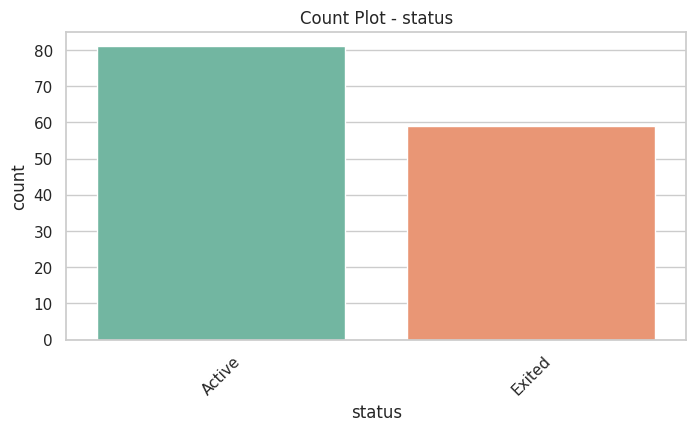

In [20]:
# Bar plot for categorical columns
cat_cols = ['location', 'salary_band', 'gender', 'status']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Count Plot - {col}")
    plt.xticks(rotation=45)
    plt.show()

**Relationship Analysis**

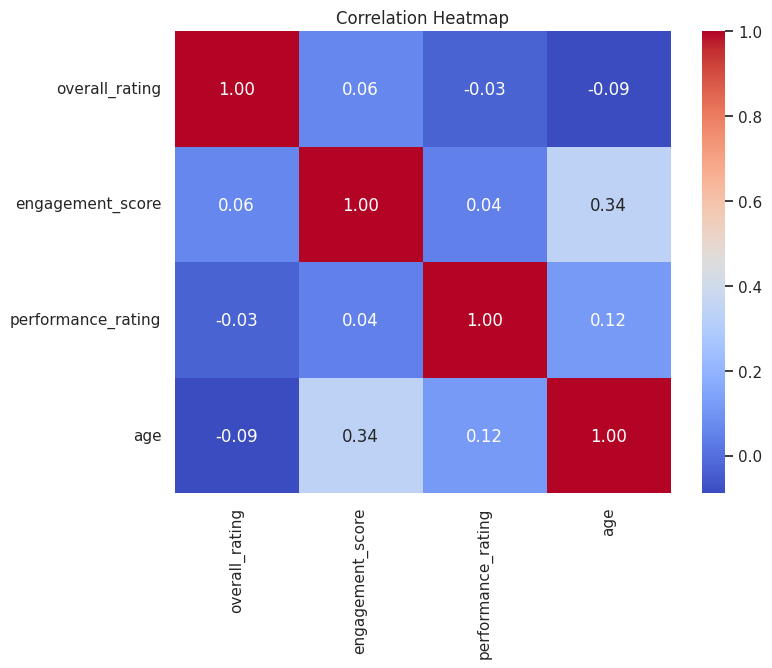

In [21]:
# Correlation matrix for numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipykernel_40094/2028174297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='engagement_score', palette="Set1")


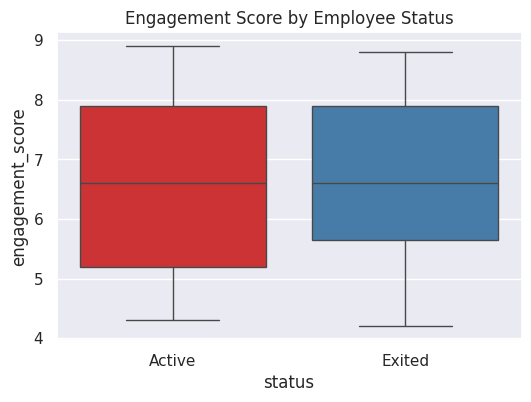

In [22]:
# Boxplot of Engagement Score by Status (Active vs Exited)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='status', y='engagement_score', palette="Set1")
plt.title("Engagement Score by Employee Status")
plt.show()

In [6]:
# Convert date columns to datetime
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')
df['exit_date'] = pd.to_datetime(df['exit_date'], errors='coerce')

In [7]:
# Calculate tenure in days (for exited employees only)
df['tenure_days'] = (df['exit_date'] - df['joining_date']).dt.days

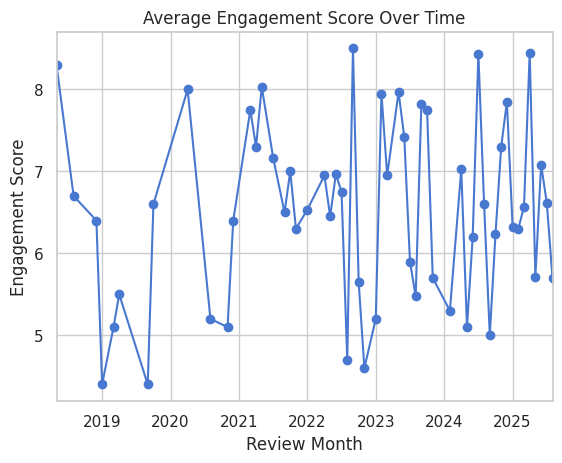

In [8]:
# Plot average engagement score over review dates
df.groupby(df['review_date'].dt.to_period('M'))['engagement_score'].mean().plot(kind='line', marker='o')
plt.title("Average Engagement Score Over Time")
plt.ylabel("Engagement Score")
plt.xlabel("Review Month")
plt.show()

**Text Analysis on Pros & Cons**

In [9]:
# Combine all 'pros' into one large string
pros_text = " ".join(str(x) for x in df['pros'] if pd.notnull(x))
cons_text = " ".join(str(x) for x in df['cons'] if pd.notnull(x))

Text(0.5, 1.0, 'Word Cloud - Pros')

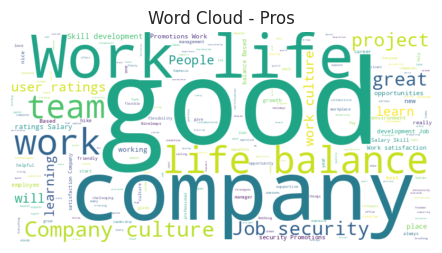

In [10]:

# Generate word clouds
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
WordCloud(width=800, height=400, background_color="white").generate(pros_text)
plt.imshow(WordCloud(width=800, height=400, background_color="white").generate(pros_text), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Pros")

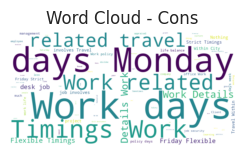

In [11]:

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color="white").generate(cons_text), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Cons")
plt.show()

**Attrition-focused Insights**

In [12]:
# Average engagement score by status
df.groupby('status')['engagement_score'].mean()

status
Active    6.467442
Exited    7.053704
Name: engagement_score, dtype: float64

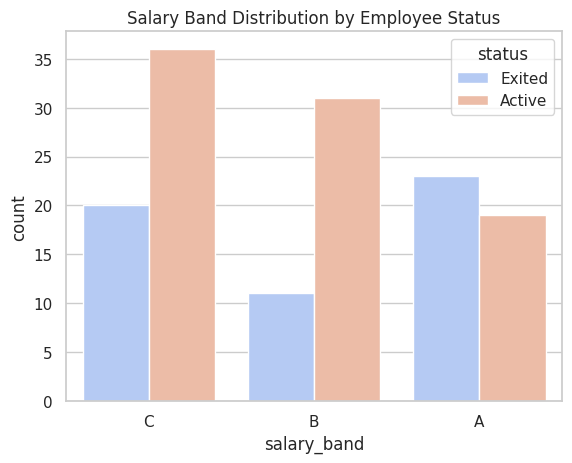

In [13]:
# Salary band distribution by status
sns.countplot(data=df, x='salary_band', hue='status', palette="coolwarm")
plt.title("Salary Band Distribution by Employee Status")
plt.show()

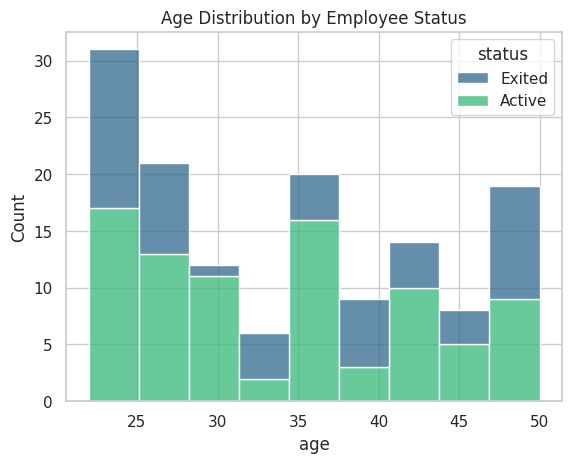

In [14]:
# Age distribution by status
sns.histplot(data=df, x='age', hue='status', multiple='stack', palette="viridis")
plt.title("Age Distribution by Employee Status")
plt.show()